# **Setup and Generating Synthetic Data**

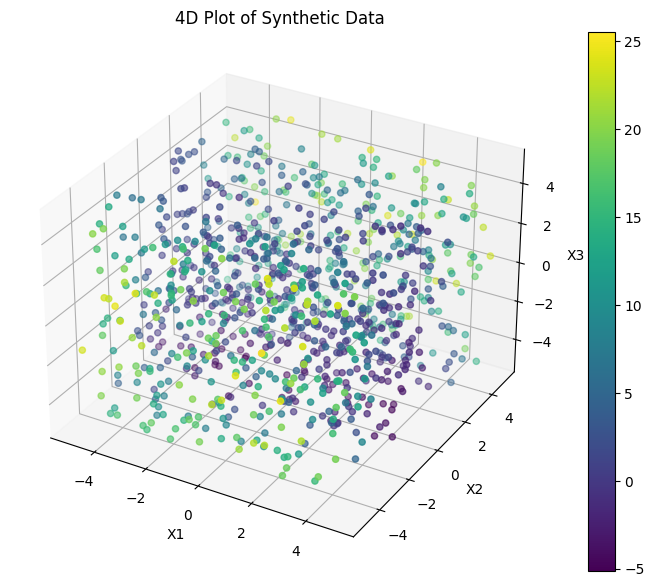

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from torch import nn
from torch import optim

# Set seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
X_np = np.random.rand(1000, 3) * 10 - 5  # Random values in the range [-5, 5]
y_np = np.sin(X_np[:, 0]) + X_np[:, 1]**2 - np.log1p(np.exp(-X_np[:, 2]))
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).view(-1, 1)

# Plotting function for 4D plot
def plot_4d(X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.squeeze(), cmap='viridis')
    fig.colorbar(p)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.title('4D Plot of Synthetic Data')
    plt.show()

plot_4d(X_np, y_np)


# **Neural Network Using PyTorch Classes**

In [2]:
class ThreeLayerNN(nn.Module):
    def __init__(self):
        super(ThreeLayerNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 64),  # Input layer to hidden layer 1
            nn.ReLU(),
            nn.Linear(64, 64),  # Hidden layer 1 to hidden layer 2
            nn.ReLU(),
            nn.Linear(64, 1)    # Hidden layer 2 to output
        )

    def forward(self, x):
        return self.model(x)


# **Training the Model**

Epoch 0: Loss = 120.71278381347656
Epoch 100: Loss = 1.0175368785858154
Epoch 200: Loss = 0.5133146047592163
Epoch 300: Loss = 0.30991584062576294
Epoch 400: Loss = 0.06096504256129265
Epoch 500: Loss = 0.03235757350921631
Epoch 600: Loss = 0.02404293604195118
Epoch 700: Loss = 0.01954561471939087
Epoch 800: Loss = 0.02018887922167778
Epoch 900: Loss = 0.018242157995700836


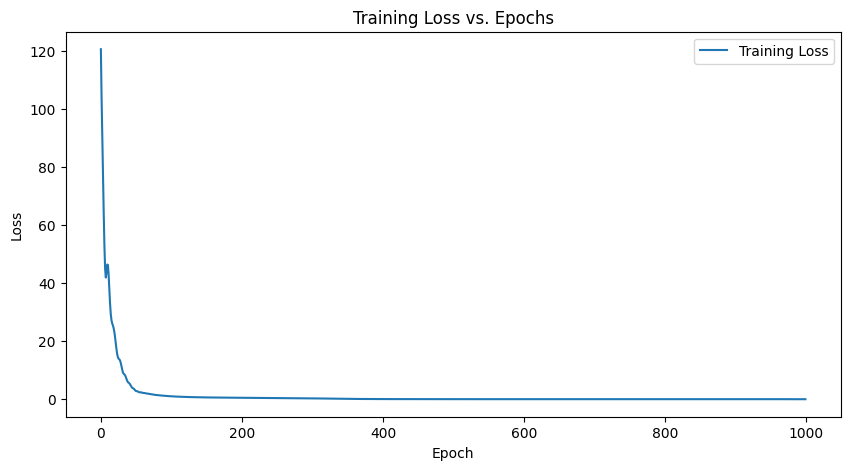

In [3]:
# Model, Loss, and Optimizer
model = ThreeLayerNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training Loop
epochs = 1000
loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss_history.append(loss.item())

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs. Epochs')
plt.show()


# **Actual vs. Predicted Plot**

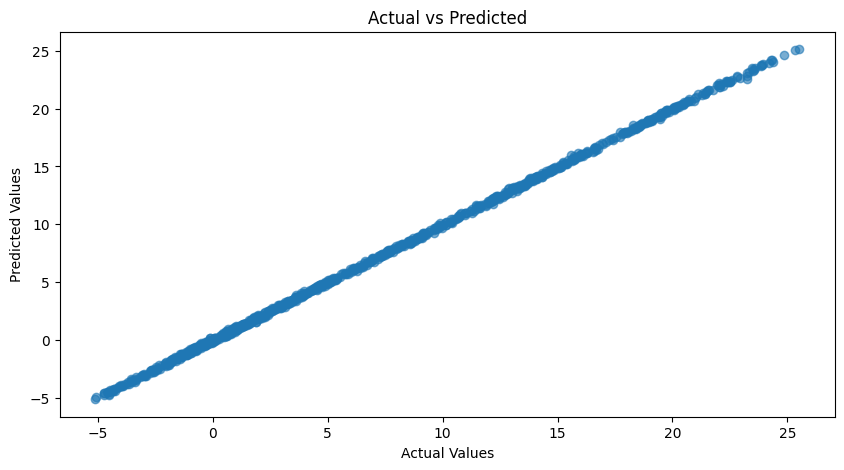

In [4]:
with torch.no_grad():
    y_predicted = model(X)

plt.figure(figsize=(10, 5))
plt.scatter(y, y_predicted, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
